In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

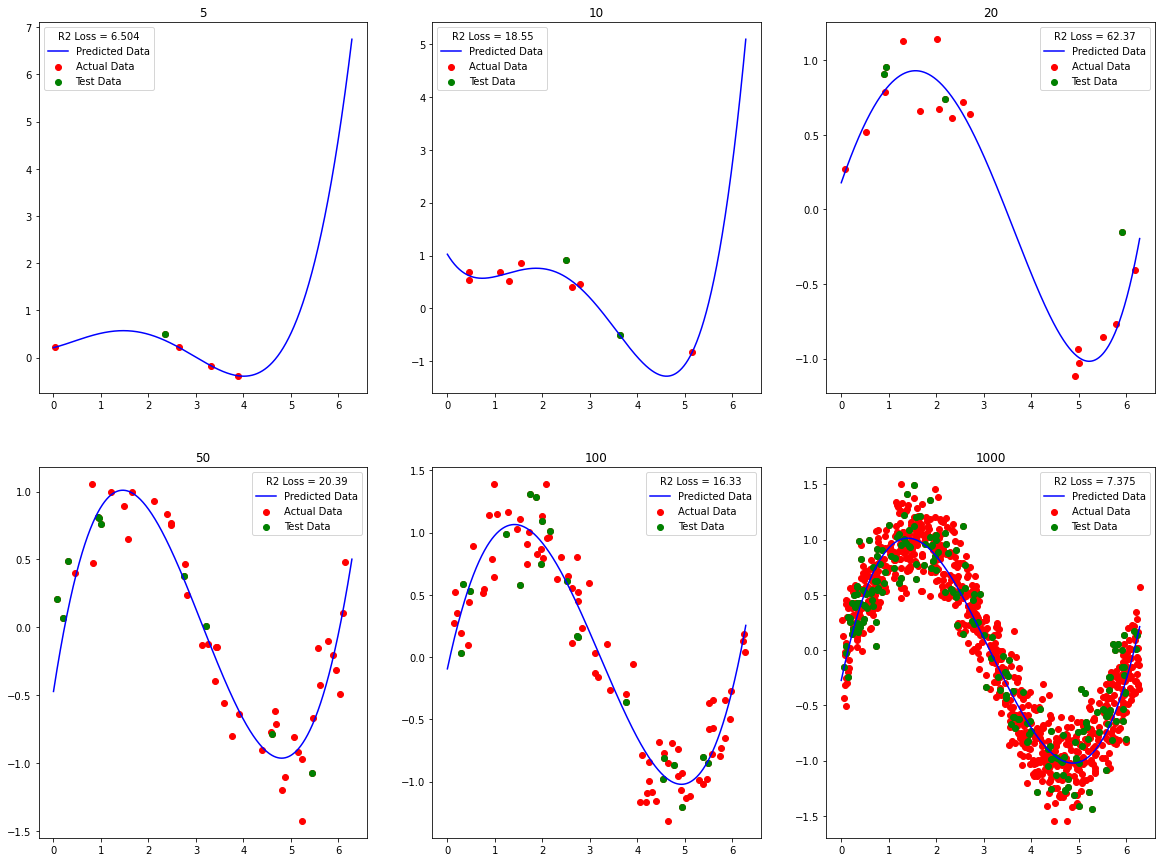

In [4]:
scores = []
line = np.linspace(0.0, 1.0, num=1000)*np.pi*2
rn = [5,10,20,50,100,1000]
k=0;l=0
fig, axs = plt.subplots(2, 3,figsize=(20,15))
for x in range(len(rn)):
    a = []
    b = []
    mean = 0
    variance = 0.05
    for i in range(rn[x]):
        rnd = np.pi*2*random.random()
        a.append(rnd)
        b.append(np.sin(rnd)+(random.gauss(mean,np.sqrt(variance))))

    a = np.array(a).reshape(-1,1)
    b = np.array(b).reshape(-1,1)

    x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2)
    poly = PolynomialFeatures(degree=4)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_poly,y_train)
    lin = LinearRegression()
    lin.fit(x_poly,y_train)
    if l==3:
        k = 1
        l =0
    
    axs[k,l].scatter(a,b,label="Actual Data",color="red")
    axs[k,l].scatter(x_test,y_test,label="Test Data",color="green")
    #axs[k,l].scatter(x_test,lin.predict(poly.fit_transform(x_test)),label="Predicted Data")
    axs[k,l].plot(line,lin.predict(poly.fit_transform(line.reshape(-1,1))),label="Predicted Data",color="blue")
    axs[k,l].set_title(rn[x])
    r2 = np.linalg.norm(y_test-poly.fit_transform(x_test),ord=2)/rn[x]
    scores.append(r2)
    axs[k,l].legend(title="R2 Loss = "+'{0:.4g}'.format(r2))
    l = l+1